<a href="https://colab.research.google.com/github/AgungMuh25/Project-1/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Agung Muhammad Sholeh
- **Email:** agungmuhammadsfps@gmail.com
- **ID Dicoding:** agungmuhs

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana distribusi pengguna biasa dan pengguna terdaftar dari waktu ke waktu?
- **Pertanyaan 2:** Apa korelasi antara situasi cuaca dan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
!pip install streamlit

## Data Wrangling

### Gathering Data

- Import data day

In [2]:
day_df = pd.read_csv('day.csv', delimiter = ',')

- Menampilkan cuplikan data

In [3]:
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### Assessing Data

- Memeriksa Missing Value

In [4]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Diperoleh nilai 0 pada semua kolom, maka dapat dinyatakan tidak ada missing value

- Memeriksa Duplicate Data dan Invalid Value

In [5]:
day_df.duplicated(subset=['dteday']).sum()

0

In [6]:
day_df['instant'].is_unique

True

Diperoleh nilai 0 pada duplicate kolom tanggal ('dteday') dan nilai True pada Invalid Value kolom primary key ('instant'), maka dapat dinyatakan pada kolom tanggal ('dteday') tidak terdapat duplicate dan invalid value pada kolom primary key ('instant')

- Memeriksa Inaccurate Value, Inconsistent Value, dan Outlier

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah melihat deskripsi yang muncul pada output di atas, tidak ada tanda-tanda keanehan pada seluruh kolom atau variabel.

### Cleaning Data

Karena tidak ditemukan keanehan data saat melakukan Assessing Data, maka tidak diperlukan proses Cleaning Data.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1

In [8]:
if (day_df['casual'] > day_df['registered']).any():
    indexes = day_df.loc[day_df['casual'] > day_df['registered']].index

    print("Ada nilai variabel 'casual' yang melebihi nilai variabel 'registered'.")
    print("Tanggal (dteday) di mana casual melebihi registered:")
    for index in indexes:
        print(day_df.loc[index, 'dteday'])
else:
    print("Tidak ada nilai variabel 'casual' yang melebihi nilai variabel 'registered'.")

Ada nilai variabel 'casual' yang melebihi nilai variabel 'registered'.
Tanggal (dteday) di mana casual melebihi registered:
2011-04-03
2011-07-04
2011-09-04


Hal ini menandakan bahwa selama periode 2 tahun dari awal tahun 2011 hingga akhir tahun 2012, hanya terjadi 3 hari di mana jumlah pengguna casual (tidak terdaftar) melebihi jumlah pengguna terdaftar. Artinya, sepanjang periode tersebut, kecuali pada 3 hari itu, jumlah pengguna terdaftar selalu lebih tinggi daripada jumlah pengguna casual (tidak terdaftar).

### Explore Pertanyaan 2

In [9]:
correlation = day_df[['cnt', 'weathersit']].corr().iloc[0, 1]

print(f"{correlation:.2f}")

-0.30


Korelasi antara jumlah penyewaan sepeda dengan situasi cuaca adalah -0.30, yang menunjukkan adanya korelasi negatif antara kedua variabel tersebut. Ini berarti, secara umum, ketika situasi cuaca memburuk, jumlah penyewaan sepeda cenderung menurun, dan sebaliknya. Meskipun nilai korelasi tidak terlalu kuat, namun adanya korelasi negatif menunjukkan adanya pengaruh situasi cuaca terhadap pola penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

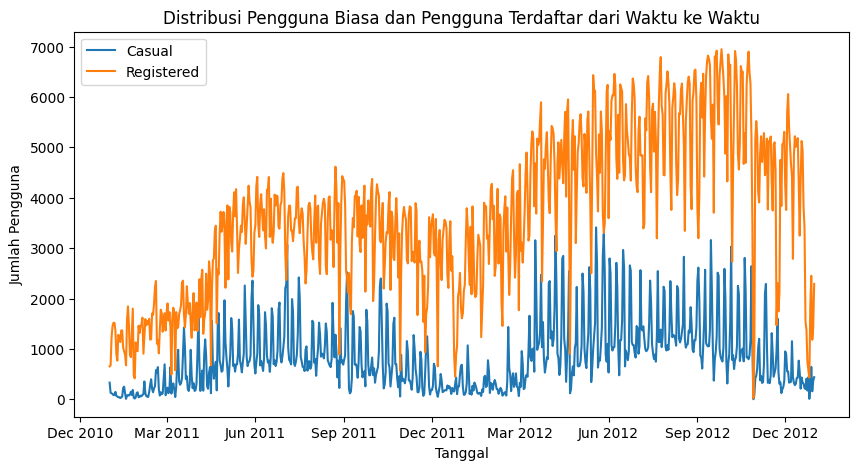

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
date_format = day_df['dteday'].dt.to_period('M')

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x='dteday', y='casual', data=day_df, label='Casual', ax=ax)
sns.lineplot(x='dteday', y='registered', data=day_df, label='Registered', ax=ax)

ax.set_title('Distribusi Pengguna Biasa dan Pengguna Terdaftar dari Waktu ke Waktu')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Pengguna')
ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.show()

Line chart di atas menunjukkan bahwa terdapat perbedaan pola penggunaan antara pengunjung registered dan casual. Pengunjung registered mengalami lonjakan pengunjung terbanyak pada bulan Oktober 2012, jauh lebih tinggi dibandingkan pengunjung casual.

### Pertanyaan 2:

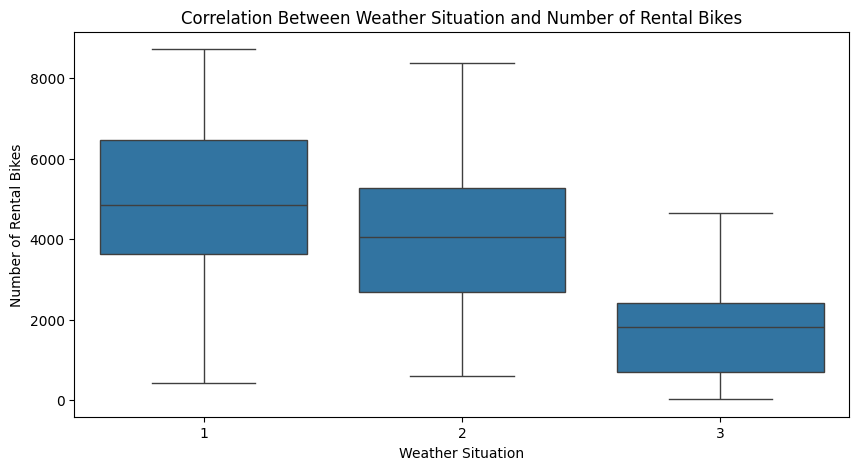

            count     mean  median  min   max      std      q1      q3     iqr
weathersit                                                                    
1             463  4876.79  4844.0  431  8714  1879.48  3636.5  6458.5  2822.0
2             247  4035.86  4040.0  605  8362  1809.11  2674.5  5257.5  2583.0
3              21  1803.29  1817.0   22  4639  1240.28   705.0  2424.0  1719.0


In [11]:
grouped_df = day_df.groupby('weathersit')['cnt'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).round(2)
grouped_df['q1'] = day_df.groupby('weathersit')['cnt'].quantile(0.25)
grouped_df['q3'] = day_df.groupby('weathersit')['cnt'].quantile(0.75)
grouped_df['iqr'] = grouped_df['q3'] - grouped_df['q1']

plt.figure(figsize=(10, 5))

sns.boxplot(x='weathersit', y='cnt', data=day_df)

plt.title('Correlation Between Weather Situation and Number of Rental Bikes')

plt.xlabel('Weather Situation')
plt.ylabel('Number of Rental Bikes')

plt.show()

print(grouped_df)

Boxplot di atas menunjukkan perbedaan yang signifikan dalam distribusi jumlah penyewaan sepeda di antara berbagai situasi cuaca. Situasi cuaca 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian) memiliki nilai median, kuartil pertama, dan kuartil ketiga yang secara signifikan lebih tinggi dibandingkan dengan situasi cuaca 2 (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut) dan 3 (Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan). Situasi cuaca 4 (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut) tidak memiliki penyewa sepeda, mungkin karena situasi cuaca yang cukup ekstrim.

## Conclusion

- Conclution pertanyaan 1:
Pengguna registered (terdaftar) hampir selalu di atas casual dan pengguna registered (terdaftar) memiliki karakteristik dan pola penggunaan yang berbeda. Faktor eksternal seperti musim, kelembapan, atau yang lainnya dapat memengaruhi jumlah pengunjung. Maka, dapat disimpulkan pengunjung registered (terdaftar) memiliki intensitas penyewaan lebih banyak daripada pengunjung casual (tidak terdaftar).
- Conclution pertanyaan 2:
Penyewa terbanyak dimiliki oleh situasi cuaca 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian). Selain itu, situasi cuaca 4 (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut) tidak terdapat penyewa sama sekali. Maka dapat disimpulkan situasi cuaca 1 akan menghasilkan banyak penyewa.

## Menjalankan Dashboard Streamlit

In [12]:
! wget -q -O - ipv4.icanhazip.com

34.106.97.90


In [13]:
! streamlit run Python.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.97.90:8501

npx: installed 22 in 2.935s
your url is: https://gentle-dancers-marry.loca.lt
2024-03-05 06:00:43.909 Invalid arguments were passed to "st.write" function. Support for passing such unknown keywords arguments will be dropped in future. Invalid arguments were: {'style': 'font-size: smaller;'}
2024-03-05 06:00:55.058 Invalid arguments were passed to "st.write" function. Support for passing such unknown keywords arguments will be dropped in future. Invalid arguments were: {'style': 'font-size: smaller;'}
2024-03-05 06:01:06.908 Invalid arguments were passed to "st.write" function. Support for passing such unknown keywords arguments will be dropped in future. Invalid arguments were: {'style': 'font-size: smaller;'}
2024-03-05 06:03:34.641 Invalid arguments were passed to "st.